In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# Import the FOOOF object
from fooof import FOOOF

C:\Users\Mitarbeiter\AppData\Local\Temp\ipykernel_16428\2741614705.py:7: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


In [3]:
# Data path
data_path = '../results/power/PFC/'
# Output paths
out_path = '../results/fooof/'
figures_path = '../results/fooof/figures'
# Frequency range to fit the fooof model
freq_range = [2, 40]

c:\Users\Mitarbeiter\miniconda3\envs\1overf\Lib\site-packages\fontTools\misc\py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(
c:\users\mitarbeiter\1overf\fooof\fooof\core\reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fpath(file_path, fname(file_name, SAVE_FORMAT)))
c:\users\mitarbeiter\1overf\fooof\fooof\core\reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fpath(file_path, fname(file_name, SAVE_FORMAT)))
c:\users\mitarbeiter\1overf\fooof\fooof\core\reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fpath(file_path, fname(file_name, SAVE_FORMAT)))
c:\users\mitarbeiter\1overf\fooof\fooof\core\reports.py:72: User

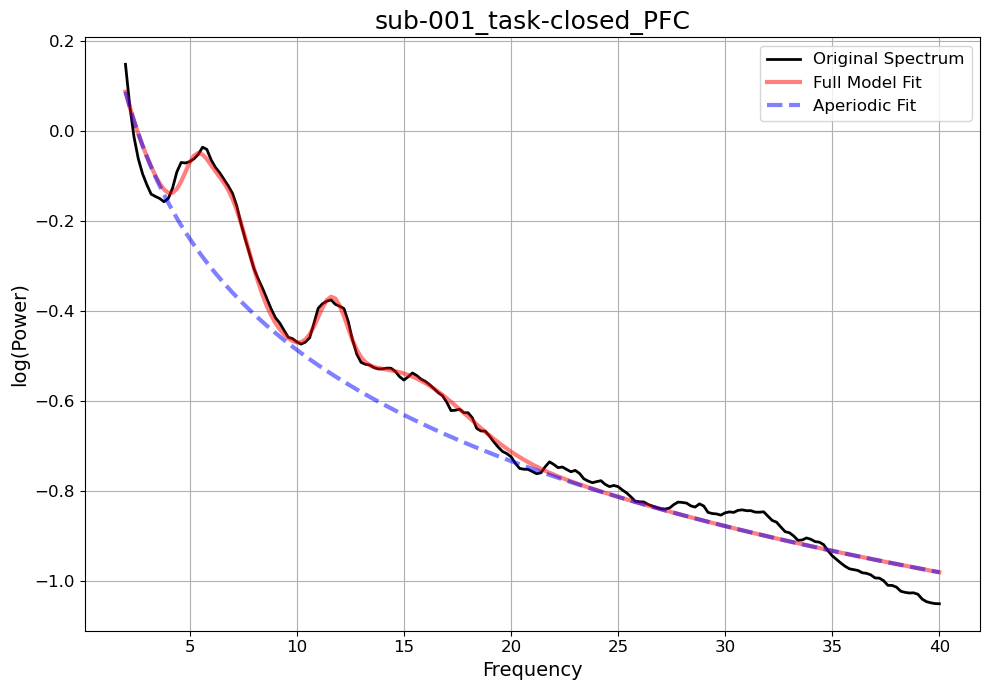

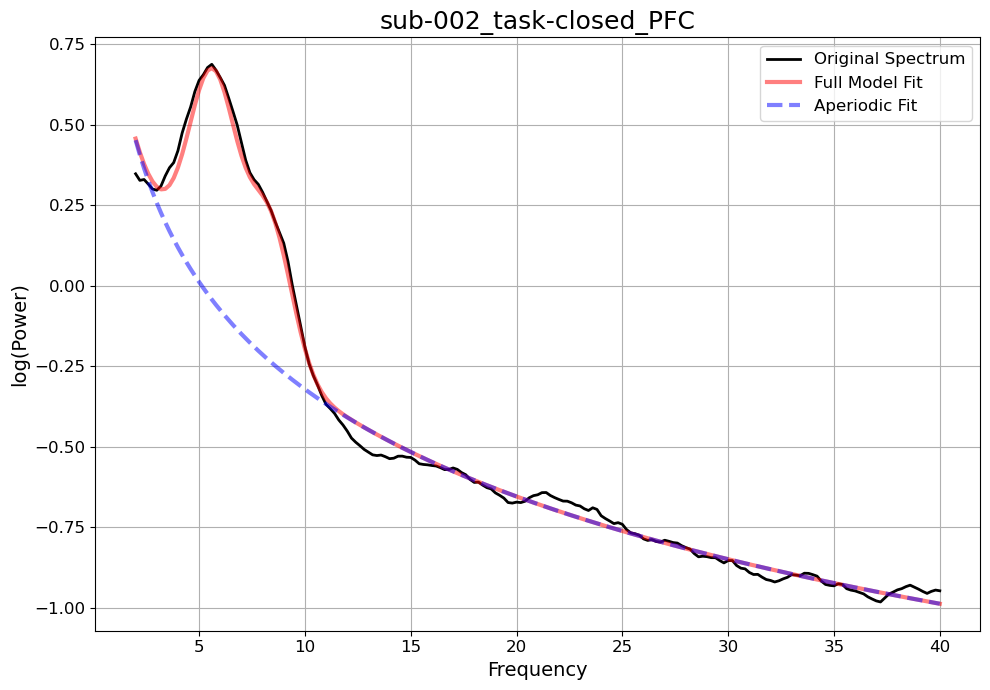

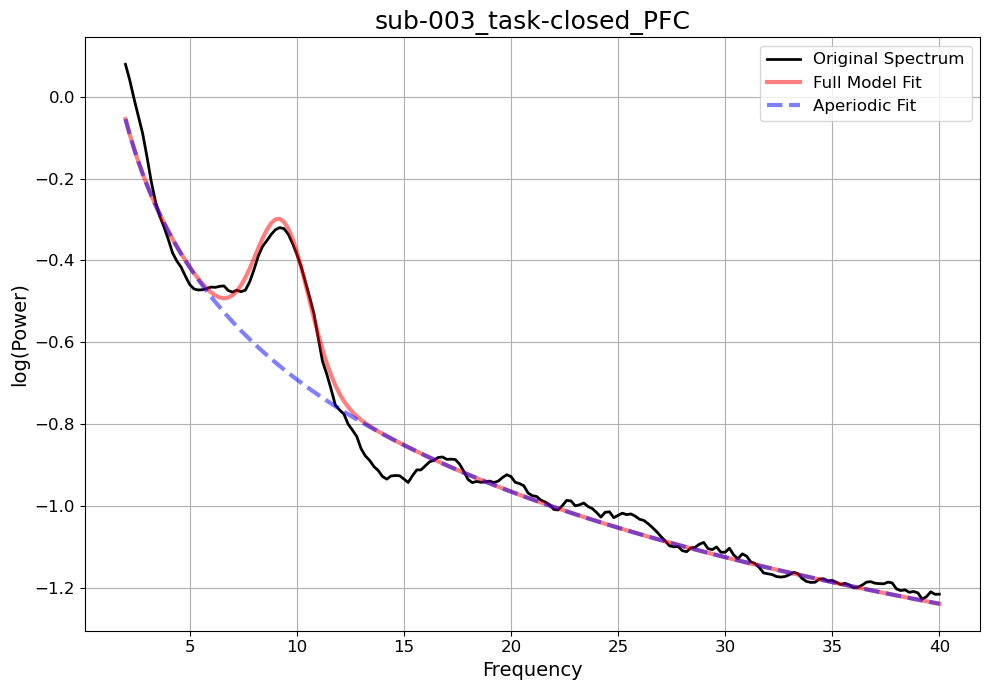

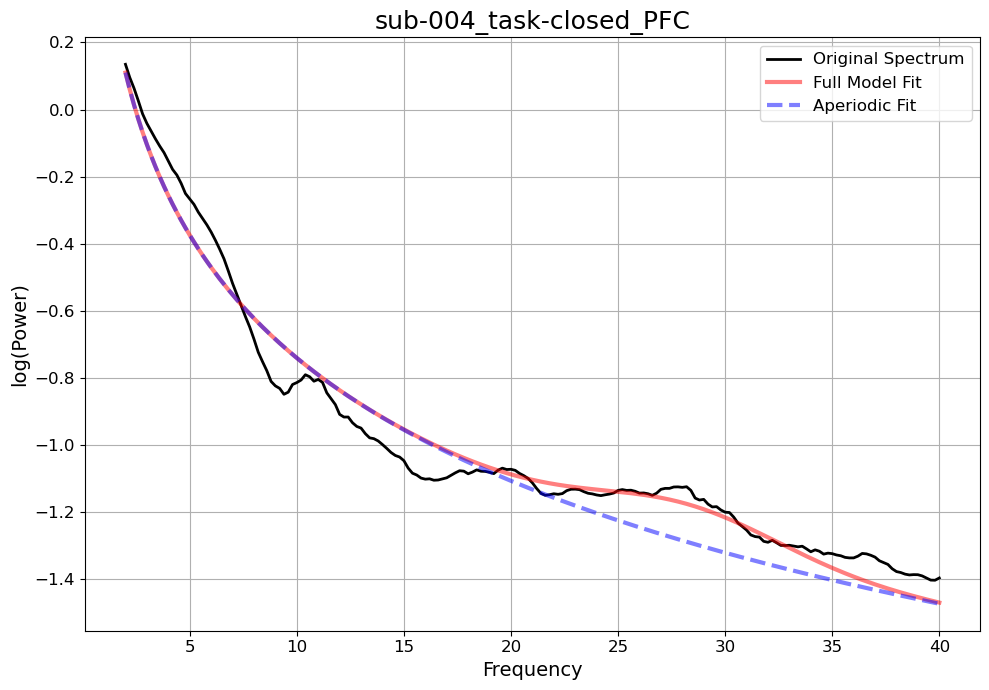

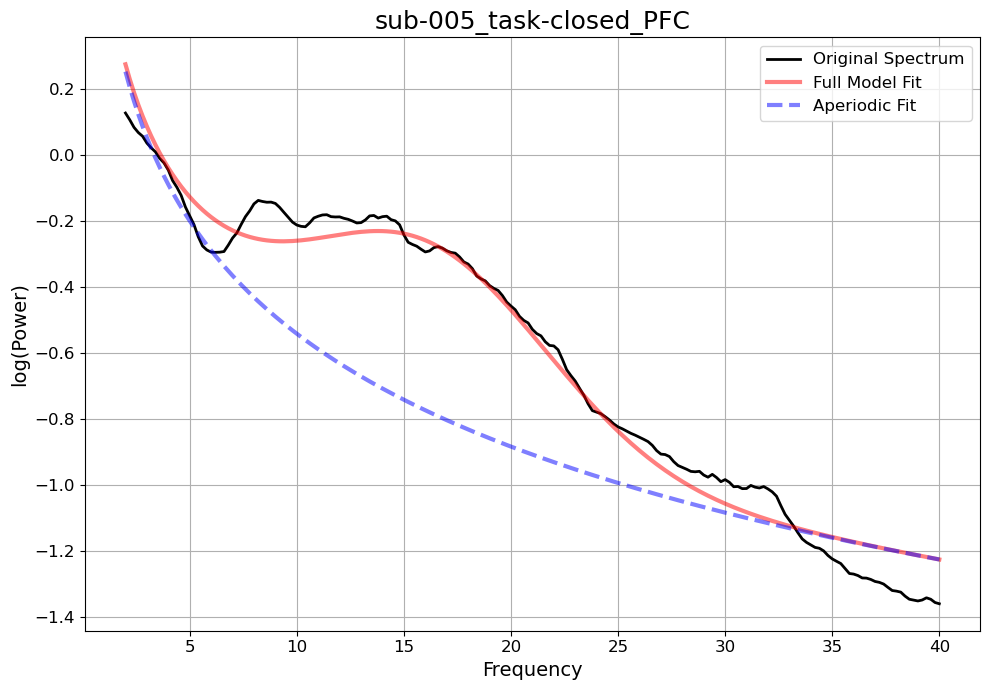

In [5]:
for file in os.listdir(data_path):
     filename = os.fsdecode(file)
     bidsID = os.path.splitext(filename)[0]

     # Import power files from matlab
     mat = sio.loadmat(os.path.join(data_path,filename))
     # Extract power and frequency from matlab structure
     pow = np.squeeze(mat['pow'])
     freq = np.squeeze(mat['freq'])
     # Average across all PFC ROIS
     avgpow = np.average(pow,0)

     # Initialize a FOOOF object
     fm = FOOOF()
     # Fit the model
     fm.fit(freq, avgpow, freq_range)
     # Save report
     fm.save_report(bidsID, file_path=out_path)
     # Extract FOOOF results from object
     fooof_results = fm.get_results()
     # Convert FOOOF results to a dictionary
     fooof_results_dict = fooof_results._asdict()
     # Save FOOOF results out to a mat file
     fnameout = os.path.join(out_path, bidsID + '_fooof.mat')
     sio.savemat(fnameout, fooof_results_dict)

     # Plotting
     fig_name = bidsID + '_foof.svg'
     fig, ax = plt.subplots(figsize=[10, 7])
     plt.title(bidsID);
     fm.plot(save_fig=True,file_name=fig_name,file_path=figures_path, ax=ax)